<span style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">An Exception was encountered at '<a href="#papermill-error-cell">In [9]</a>'.</span>

this script plots the paper reduction of countries after a specific country is removed

In [1]:
import pandas as pd
from ast import literal_eval
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import geopandas as gp
import os
import funding.core

In [2]:
cntry_full_path="../../data/nf_folder/Data/DerivedData/Derived/cntry_author_full.csv"
cntry_filter_path='../../data/nf_folder/Data/DerivedData/Derived/dep-FundExchange/pub_no_foreign_top20.csv'
geo_path="../../data/nf_folder/Data/AdditionalData/world_map_shp/ne_50m_admin_0_countries.shp"

map_dir="../../data/nf_folder/Figs/dep-FundExchange/influncial_area"

In [3]:
# Parameters
cntry_full_path = (
    "../data/NationalFunding/Data/DerivedData/Derived/cntry_author_full.csv"
)
cntry_filter_path = "../data/NationalFunding/Data/DerivedData/Derived/dependence/pub_noforeign_fund_top20.csv"
geo_path = "../data/NationalFunding/Data/AdditionalData/world_map_shp/ne_50m_admin_0_countries.shp"
map_dir = "../data/NationalFunding/Figs/Figs/influence_area"


In [4]:
raw_df=pd.read_csv(cntry_full_path)
raw_df=raw_df.rename(columns={'aucntry':'cntry'})
raw_df.head()

,cntry,year,dis,count
0,Afghanistan,2009,3,1
1,Afghanistan,2009,33,1
2,Afghanistan,2009,35,1
3,Afghanistan,2009,44,2
4,Afghanistan,2009,47,1


In [5]:
filter_df=pd.read_csv(cntry_filter_path)
filter_df.head()

,author_distinct,dis,count,srce_cntry,year
0,Afghanistan,1,2,China,2017
1,Afghanistan,4,1,China,2017
2,Afghanistan,7,1,China,2017
3,Afghanistan,12,1,China,2017
4,Afghanistan,15,1,China,2017


In [6]:
def read_group(path,groupby,reset_col):
    df=pd.read_csv(path)
    df=df.rename(columns={'author_distinct':'cntry'})
    df=df.groupby(groupby)['count'].sum().reset_index(name=reset_col)
    return df

In [7]:
raw_df=read_group(cntry_full_path,['cntry'],'raw')
filter_df=read_group(cntry_filter_path,['cntry','srce_cntry'],'filter')

In [8]:
meta=raw_df.merge(filter_df,on='cntry')
meta['p']=(meta['raw']-meta['filter'])/meta['raw']
meta['p']=meta['p'].apply(lambda x:np.around(x,2))

<span id="papermill-error-cell" style="color:red; font-family:Helvetica Neue, Helvetica, Arial, sans-serif; font-size:2em;">Execution using papermill encountered an exception here and stopped:</span>

FileNotFoundError: [Errno 2] No such file or directory: '../data/NationalFunding/Figs/Figs/influence_area/Australia_map.pdf'

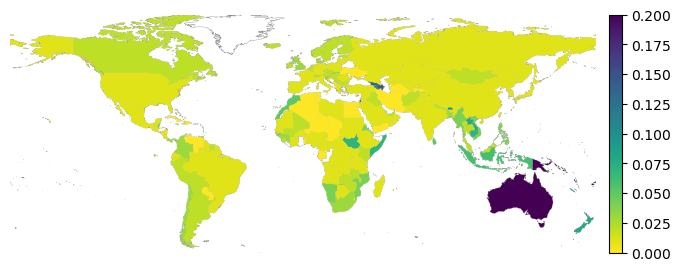

In [9]:

world_geo=funding.core.read_geofile(geo_path)
for c in meta.srce_cntry.unique():

    fig, ax = plt.subplots(figsize=(8,6))
    df=meta[meta.srce_cntry==c]
    
    plot_data=world_geo.merge(df,left_on='WoS',right_on='cntry')
    plot_data=gp.GeoDataFrame(plot_data)
    fig,ax=funding.core.plot_worldmap(ax, fig, world_geo, plot_data, 'p','viridis_r',0.0,0.2)
    ax.margins(0)
    plot_path=os.path.join(map_dir, c+ '_map'+'.' + "pdf")
    plt.savefig(plot_path,bbox_inches='tight')
    plt.close()